# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [3]:
df= pd.read_csv("reviews_sentiment.csv",sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [10]:
df2 = df.drop(columns=["Review Title","Review Text","titleSentiment","textSentiment"])

Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

In [6]:
X = df[["wordcount","sentimentValue"]]
y= df["Star Rating"]

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating. Realiza otras visualizaciones para ver la relación de tus datos.

<Axes: xlabel='Star Rating', ylabel='count'>

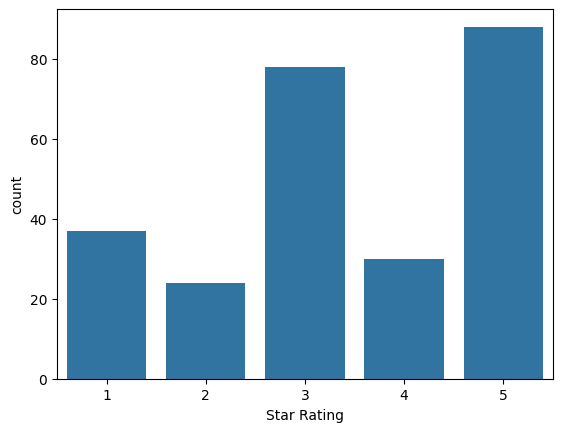

In [9]:
sns.countplot(x = y)

<Axes: >

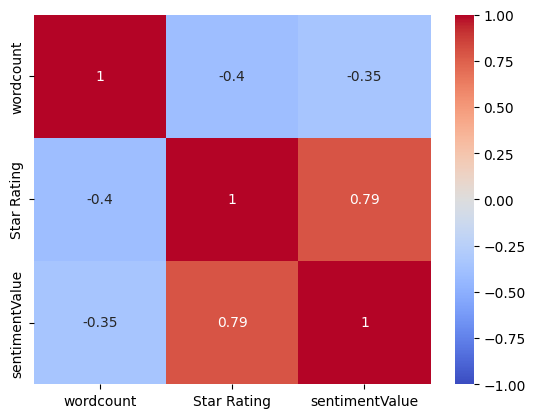

In [11]:
sns.heatmap(df2.corr(),annot=True,vmin=-1,cmap="coolwarm")

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
scal = MinMaxScaler()
X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.transform(X_test)

## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [16]:
modelo_1 = KNeighborsClassifier(n_neighbors=15)
modelo_1.fit(X_train_scal,y_train)

KNeighborsClassifier(n_neighbors=15)

In [22]:
pred = modelo_1.predict(X_test_scal)
pred_train = modelo_1.predict(X_train_scal)
print(accuracy_score(y_train,pred_train))
print(precision_score(y_train,pred_train,average="weighted"))
print(recall_score(y_train,pred_train,average="weighted"))
print(f1_score(y_train,pred_train,average="weighted"))

0.8682926829268293
0.876959349593496
0.8682926829268293
0.8614931062386756


## Evalúa tu modelo

In [23]:
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred,average="weighted"))
print(recall_score(y_test,pred,average="weighted"))
print(f1_score(y_test,pred,average="weighted"))

0.8076923076923077
0.8490384615384615
0.8076923076923077
0.7962361098965874


## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [29]:
params = {
    "n_neighbors": np.arange(1,150)
}
gs = GridSearchCV(estimator= modelo_1,param_grid=params,cv=10,verbose=2)
gs.fit(X_train_scal,y_train)
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 149 candidates, totalling 1490 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ...................................

## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [45]:
nuevos_valores = {
    "wordcount":[0.45,0.21,0.87,0.94,0.62,0.32,0.18],
    "sentimentValue":[0.11,0.27,0.55,0.67,0.9,0.712345,0.327222]
}

df3 = pd.DataFrame(nuevos_valores)


In [46]:
h_modelo_1 = gs.best_estimator_
y_pred = h_modelo_1.predict(df3)

c:\Users\rafac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [47]:
y_pred

array([2, 1, 2, 2, 2, 4, 3])

In [50]:
nueva_review = [[5,1]]

In [ ]:
scal2 = MinMaxScaler()
nrscal = scal.transform(nueva_review)

In [52]:
predejemplo =h_modelo_1.predict(nrscal)

In [53]:
predejemplo

array([5])